In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.datasets.utils import download_url
import os
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [ ]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(32)])

batch_size = 128

In [3]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
trainset = ImageFolder(data_dir+'/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = ImageFolder(data_dir+'/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
print(img.shape)
# print(train_labels)

Feature batch shape: torch.Size([128, 3, 32, 32])
Labels batch shape: torch.Size([128])
torch.Size([3, 32, 32])
Feature batch shape: torch.Size([128, 3, 32, 32])
Labels batch shape: torch.Size([128])
torch.Size([3, 32, 32])


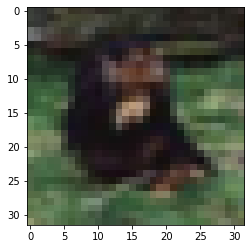

In [10]:
plt.imshow(img.swapaxes(0,1).swapaxes(1,2))